In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster, GroupedLayerControl
import ast
import seaborn as sns
from scipy.optimize import curve_fit

from data_utilities import *

## Regression

In [2]:
census_df = pd.read_csv("./assets/census_2016_new.csv")
census_df = census_df[census_df["Boundary Type"] == "Neighbourhood"]

# combined_df = pd.merge(DF, census_df, left_on="Neighbourhood", right_on="Boundary Name", how="inner")
combined_df = DF.groupby("Neighbourhood").size().sort_values().to_frame().rename(columns={0: "Count"})
combined_df = pd.merge(combined_df, census_df, left_on="Neighbourhood", right_on="Boundary Name", how="inner")
combined_df = combined_df[combined_df['Population 2016'] != 0]

In [3]:
combined_df['Average Household Income'] = combined_df['Average and Median Household Income'].str.strip("[]").str.split(', ').str[0]
combined_df['Median Household Income'] = combined_df['Average and Median Household Income'].str.strip("[]").str.split(', ').str[1]

In [4]:
combined_df['Average Household Income']= combined_df['Average Household Income'].astype(int)
combined_df['Median Household Income']= combined_df['Median Household Income'].astype(int)

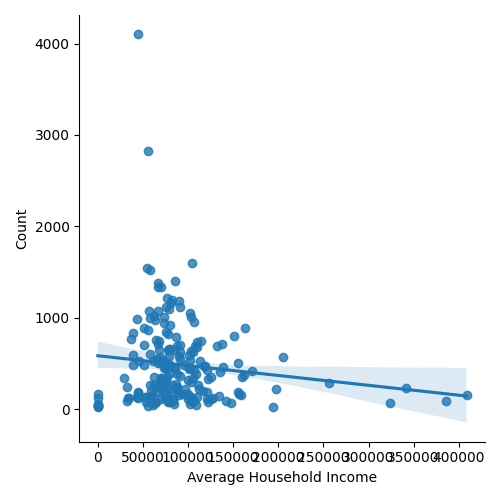

In [5]:
# combined_df.plot(kind="scatter", x="Average Household Income", y="Count")
sns.lmplot(x="Average Household Income", y="Count", data=combined_df)
plt.show()

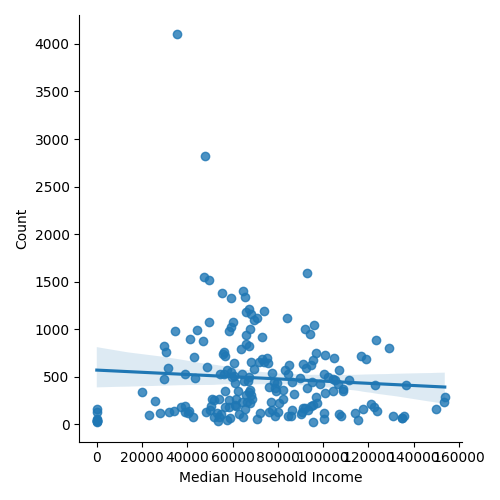

In [6]:
# combined_df.plot(kind="scatter", x="Median Household Income", y="Count")
sns.lmplot(x="Median Household Income", y="Count", data=combined_df)
plt.show()

Income doesn't seem to be a good predictor of the number of events.

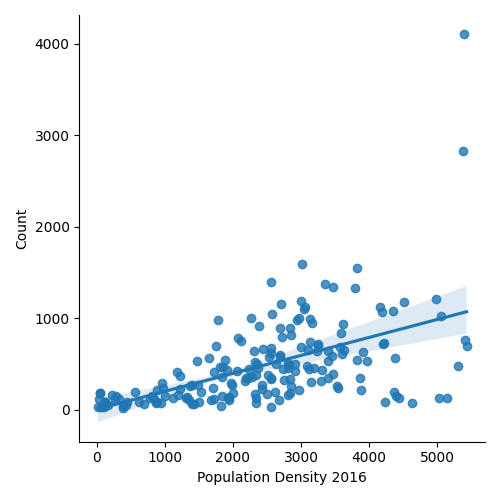

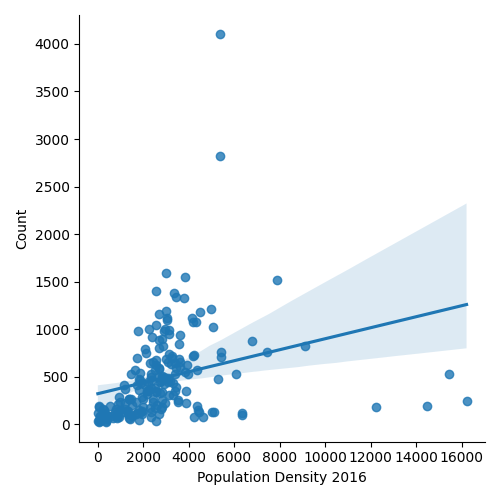

In [7]:
sns.lmplot(x="Population Density 2016", y="Count", data=combined_df)
sns.lmplot(x="Population Density 2016", y="Count", data=combined_df[combined_df["Population Density 2016"] < 6000])
plt.show()

There's a positive correlation between population density and number of events.

In [8]:
combined_df[combined_df["Population Density 2016"] > 6000]

,Count,Boundary Type,Boundary Name,Population 2016,Population Density 2016,Year opened,Aboriginal,Aboriginal Percent,Visible Minorities Names,Visible Minorities Numbers,...,Own vs Rent Percent,Bad Dwelling,Bad Dwelling Percent,Average and Median Household Income,Commuting Method,Commuting Method Percent,LIM-AT,LICO-AT,Average Household Income,Median Household Income
62,94,Neighbourhood,China Town,420,6364.311366,1986,0,0.000000,"['Chinese', 'South Asian', 'Filipino']","[310, 30, 25]",...,"[0, 1]",15,0.081081,"[32142, 22886]","[35, 85]","[0.2916666666666667, 0.7083333333333334]",0.571429,0.321429,32142,22886
69,119,Neighbourhood,Portage-Ellice,1075,6343.268170,2001,120,0.111628,"['South Asian', 'Chinese', 'Filipino']","[110, 90, 70]",...,"[0.058394160583941604, 0.9416058394160584]",35,0.051095,"[44469, 40481]","[115, 295]","[0.2804878048780488, 0.7195121951219512]",0.242991,0.228972,44469,40481
98,182,Neighbourhood,Alpine Place,3895,12236.883443,1971,475,0.121951,"['Black', 'South Asian', 'Filipino']","[630, 260, 145]",...,"[0.03991130820399113, 0.9600886917960089]",160,0.070953,"[44114, 37015]","[855, 575]","[0.5979020979020979, 0.40209790209790214]",0.311938,0.243902,44114,37015
102,188,Neighbourhood,Roslyn,4550,14491.045808,1971,235,0.051648,"['South Asian', 'Black', 'Chinese']","[135, 90, 90]",...,"[0.3697068403908795, 0.6302931596091205]",225,0.073290,"[88912, 61605]","[1415, 990]","[0.5883575883575883, 0.41164241164241167]",0.135165,0.119780,88912,61605
115,240,Neighbourhood,Central Park,3775,16221.907095,2001,675,0.178808,"['Black', 'Filipino', 'South Asian']","[1065, 850, 185]",...,"[0.11023622047244094, 0.889763779527559]",190,0.099738,"[32248, 25574]","[435, 930]","[0.31868131868131866, 0.6813186813186812]",0.543046,0.475497,32248,25574
164,524,Neighbourhood,Broadway-Assiniboine,5270,15452.189109,1981,720,0.136622,"['Black', 'Filipino', 'South Asian']","[505, 340, 205]",...,"[0.06721536351165981, 0.9327846364883402]",345,0.094521,"[45656, 38847]","[930, 2135]","[0.3034257748776509, 0.6965742251223491]",0.313390,0.275404,45656,38847
165,525,Neighbourhood,Mcmillan,3445,6074.487856,1971,375,0.108853,"['South Asian', 'Filipino', 'Black']","[95, 70, 60]",...,"[0.31592039800995025, 0.6840796019900498]",265,0.131841,"[72318, 54548]","[1250, 1120]","[0.5274261603375527, 0.4725738396624472]",0.172714,0.200290,72318,54548
199,763,Neighbourhood,West Broadway,5010,7429.442540,1971,1160,0.231537,"['Black', 'Filipino', 'Arab']","[570, 135, 135]",...,"[0.08445945945945946, 0.9155405405405406]",405,0.136824,"[37279, 30527]","[910, 1710]","[0.3473282442748092, 0.6526717557251908]",0.466068,0.430140,37279,30527
203,828,Neighbourhood,Spence,4415,9125.954711,1971,1210,0.274066,"['Black', 'Filipino', 'Chinese']","[730, 705, 185]",...,"[0.1745635910224439, 0.8254364089775561]",245,0.122195,"[38787, 29675]","[530, 1035]","[0.33865814696485624, 0.6613418530351437]",0.524349,0.462061,38787,29675
205,871,Neighbourhood,St. Matthews,5770,6774.256417,1971,1110,0.192374,"['Filipino', 'Black', 'Southeast Asian']","[1465, 530, 300]",...,"[0.5132743362831859, 0.48672566371681414]",395,0.174779,"[55625, 47077]","[1330, 1340]","[0.49812734082397003, 0.50187265917603]",0.298352,0.242845,55625,47077


There are some outliers. Notice these neighbourhoods have a high population density but low number of events because these neighbourhoods have a lot of apartment buildings instead of houses. These apartment buildings have their own caretaking service, which overlaps with city's service and is not included in the data.

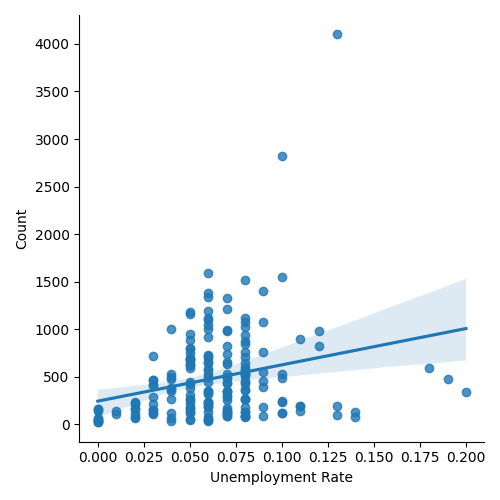

In [9]:
# combined_df.plot(kind="scatter", x="Unemployment Rate", y="Count")
sns.lmplot(x="Unemployment Rate", y="Count", data=combined_df)
plt.show()

There's a positive correlation between the unemployment rate and the number of events.

In [10]:
combined_df[combined_df["Unemployment Rate"] > 0.1]

,Count,Boundary Type,Boundary Name,Population 2016,Population Density 2016,Year opened,Aboriginal,Aboriginal Percent,Visible Minorities Names,Visible Minorities Numbers,...,Own vs Rent Percent,Bad Dwelling,Bad Dwelling Percent,Average and Median Household Income,Commuting Method,Commuting Method Percent,LIM-AT,LICO-AT,Average Household Income,Median Household Income
51,79,Neighbourhood,Edgeland,1255,4638.596076,1971,160,0.127490,"['Black', 'West Asian', 'Visible minority not ...","[125, 60, 55]",...,"[0.4126984126984127, 0.5873015873015873]",60,0.096000,"[79064, 51763]","[215, 105]","[0.671875, 0.328125]",0.438247,0.306773,79064,51763
62,94,Neighbourhood,China Town,420,6364.311366,1986,0,0.000000,"['Chinese', 'South Asian', 'Filipino']","[310, 30, 25]",...,"[0, 1]",15,0.081081,"[32142, 22886]","[35, 85]","[0.2916666666666667, 0.7083333333333334]",0.571429,0.321429,32142,22886
78,129,Neighbourhood,Pembina Strip,3175,4444.313798,1971,150,0.047244,"['South Asian', 'Chinese', 'Black']","[635, 390, 230]",...,"[0.19287833827893175, 0.8071216617210683]",80,0.047478,"[43921, 38914]","[760, 660]","[0.5352112676056338, 0.46478873239436613]",0.382677,0.324409,43921,38914
83,136,Neighbourhood,St. John's Park,530,1318.037467,1971,150,0.283019,"['Black', 'Southeast Asian', 'Filipino']","[45, 10, 0]",...,"[0.5686274509803921, 0.43137254901960786]",25,0.100000,"[58337, 40872]","[160, 75]","[0.6808510638297872, 0.3191489361702128]",0.452830,0.386792,58337,40872
101,188,Neighbourhood,Rosser-Old Kildonan,680,42.511717,1971,50,0.073529,"['Filipino', 'South Asian', 'Latin American']","[305, 110, 15]",...,"[0.9487179487179487, 0.05128205128205128]",0,0.000000,"[121020, 94781]","[290, 85]","[0.7733333333333333, 0.22666666666666668]",0.125926,0.125926,121020,94781
103,191,Neighbourhood,Montcalm,4940,4371.190141,1971,400,0.080972,"['Chinese', 'South Asian', 'Black']","[830, 790, 725]",...,"[0.09898989898989899, 0.901010101010101]",140,0.056566,"[44955, 39030]","[1075, 1040]","[0.508274231678487, 0.49172576832151305]",0.403242,0.362715,44955,39030
104,193,Neighbourhood,South Point Douglas,390,562.596832,1971,205,0.525641,"['Black', 'Southeast Asian', 'Filipino']","[25, 10, 0]",...,"[0.11764705882352941, 0.8823529411764706]",10,0.058824,"[59433, 50578]","[90, 65]","[0.5806451612903226, 0.41935483870967744]",0.397436,0.320513,59433,50578
129,339,Neighbourhood,Lord Selkirk Park,1520,2843.327067,1971,975,0.641447,"['Black', 'Filipino', 'Chinese']","[175, 10, 10]",...,"[0.09448818897637795, 0.905511811023622]",50,0.078125,"[28570, 20047]","[90, 145]","[0.3829787234042553, 0.6170212765957447]",0.704918,0.560656,28570,20047
157,481,Neighbourhood,Centennial,2830,5312.149806,1971,955,0.337456,"['Black', 'Filipino', 'Southeast Asian']","[420, 365, 190]",...,"[0.20772946859903382, 0.7922705314009661]",180,0.175610,"[39134, 29635]","[270, 420]","[0.391304347826087, 0.6086956521739131]",0.592920,0.467257,39134,29635
176,589,Neighbourhood,Dufferin,2255,3452.103027,1971,935,0.414634,"['Filipino', 'Black', 'Arab']","[370, 85, 60]",...,"[0.30952380952380953, 0.6904761904761905]",110,0.130952,"[38693, 31376]","[260, 315]","[0.45217391304347826, 0.5478260869565217]",0.547672,0.467849,38693,31376


For neighbourhoods with unemployment rate > 10%, the education level is much lower. For example, both China Town and Lord Selkirk Park have more than half of people doesn't have a high school diploma or other higher education.

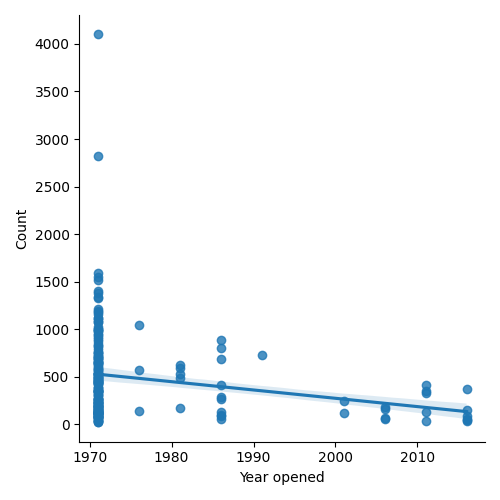

In [11]:
# combined_df.plot(kind="scatter", x="Year opened", y="Count")
sns.lmplot(x="Year opened", y="Count", data=combined_df)
plt.show()

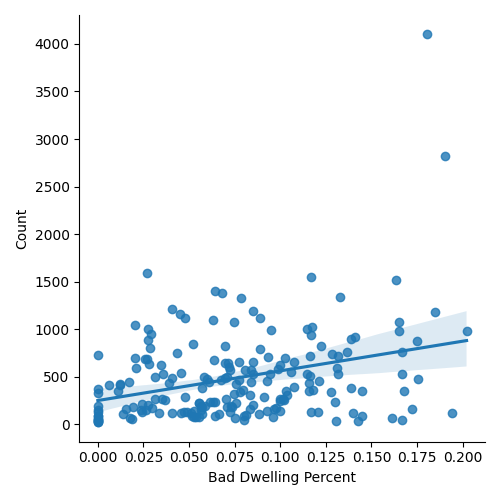

In [12]:
# combined_df.plot(kind="scatter", x="Bad Dwelling Percent", y="Count")
sns.lmplot(x="Bad Dwelling Percent", y="Count", data=combined_df)
plt.show()

There is a positive correlation between the proportion of bad dwelling and the number of events.

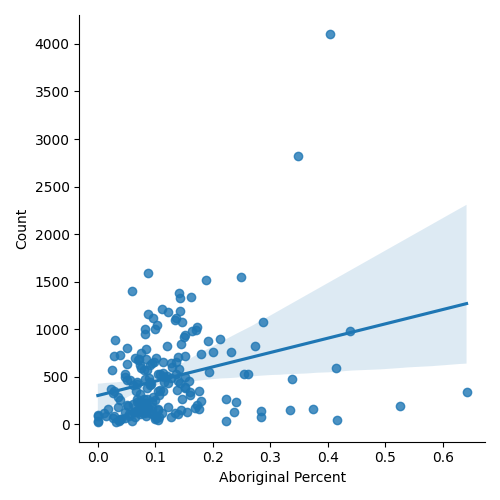

In [13]:
# combined_df.plot(kind="scatter", x="Aboriginal Percent", y="Count")
sns.lmplot(x="Aboriginal Percent", y="Count", data=combined_df)
plt.show()

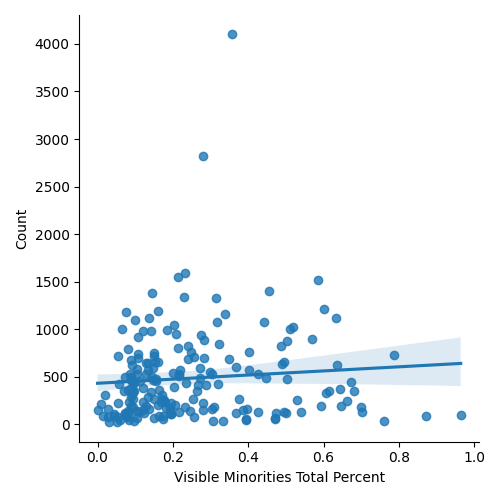

In [14]:
# combined_df.plot(kind="scatter", x="Visible Minorities Total Percent", y="Count")
sns.lmplot(x="Visible Minorities Total Percent", y="Count", data=combined_df)
plt.show()

In [15]:
combined_df['No Education'] = combined_df['Education Percent'].str.strip("[]").str.split(', ').str[0]
combined_df['High School Education'] = combined_df['Education Percent'].str.strip("[]").str.split(', ').str[1]
combined_df['Undergraduate Education'] = combined_df['Education Percent'].str.strip("[]").str.split(', ').str[2]

combined_df['No Education'] = combined_df['No Education'].astype(float)
combined_df['High School Education'] = combined_df['High School Education'].astype(float)
combined_df['Undergraduate Education'] = combined_df['Undergraduate Education'].astype(float)

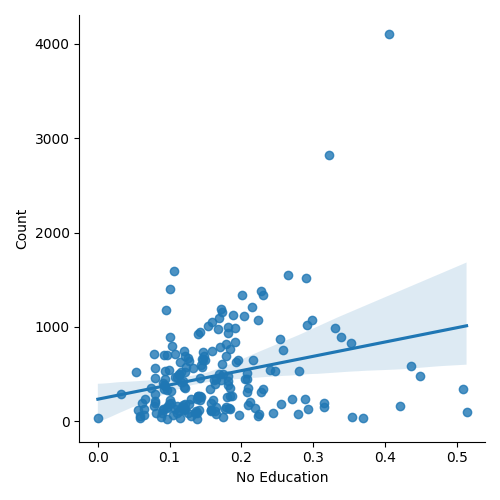

In [16]:
# combined_df.plot(kind="scatter", x="No Education", y="Count")
sns.lmplot(x="No Education", y="Count", data=combined_df)
plt.show()

This confirms what we had before, poor education have a positive correlation with the number of events.

In [17]:
combined_df['Non Citizenship Percent'] = combined_df['Citizenship Percent'].str.strip("[]").str.split(', ').str[1].astype(float)

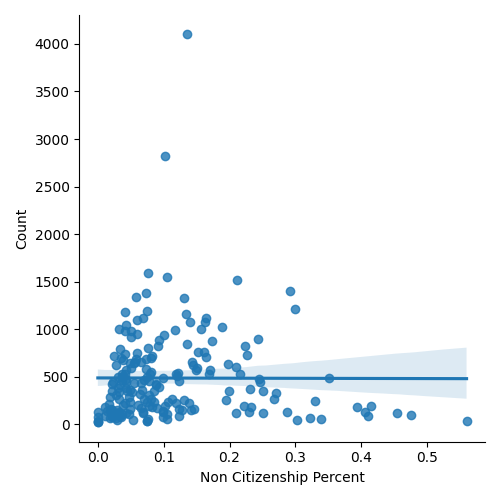

In [18]:
# combined_df.plot(kind="scatter", x="Non Citizenship Percent", y="Count")
sns.lmplot(x="Non Citizenship Percent", y="Count", data=combined_df)
plt.show()

In [19]:
combined_df['House'] = combined_df['Household Type'].str.strip("[]").str.split(', ').str[0].astype(int)
combined_df['Apartment'] = combined_df['Household Type'].str.strip("[]").str.split(', ').str[1].astype(int)
combined_df['Other'] = combined_df['Household Type'].str.strip("[]").str.split(', ').str[2].astype(int)

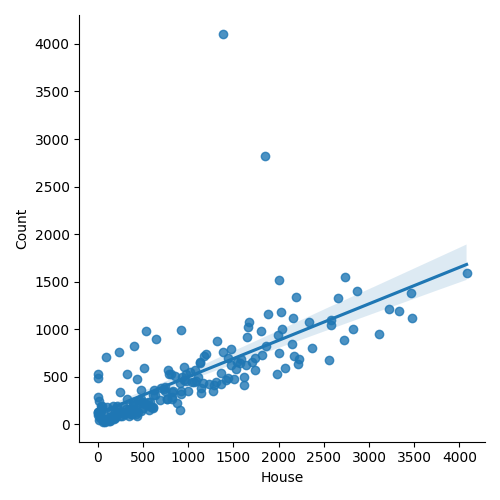

In [20]:
# combined_df.plot(kind="scatter", x="House", y="Count")
sns.lmplot(x="House", y="Count", data=combined_df)
plt.show()

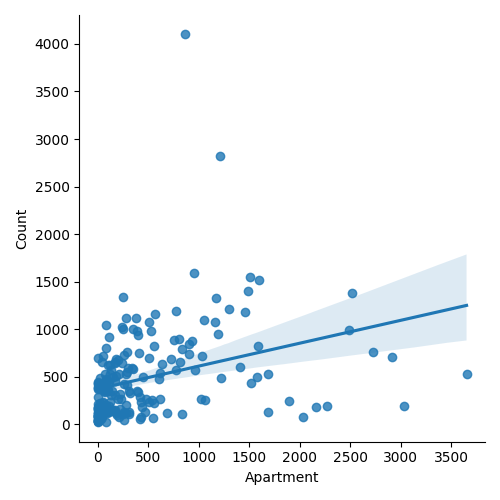

In [21]:
# combined_df.plot(kind="scatter", x="Apartment", y="Count")
sns.lmplot(x="Apartment", y="Count", data=combined_df)
plt.show()

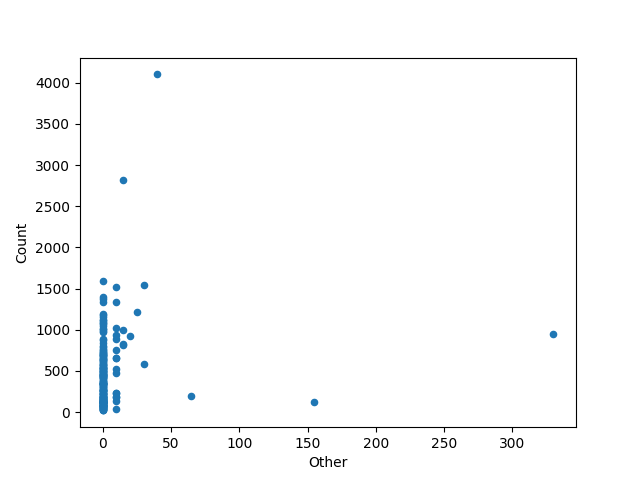

In [22]:
combined_df.plot(kind="scatter", x="Other", y="Count")
plt.show()

In [23]:
combined_df['Rent Percent'] = combined_df['Own vs Rent Percent'].str.strip("[]").str.split(', ').str[1].astype(float)

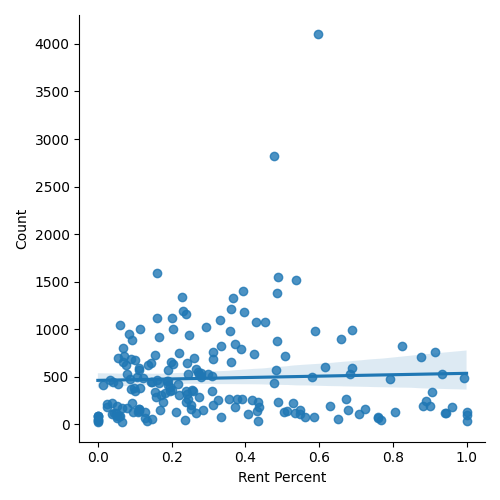

In [24]:
# combined_df.plot(kind="scatter", x="Rent Percent", y="Count")
sns.lmplot(x="Rent Percent", y="Count", data=combined_df)
plt.show()

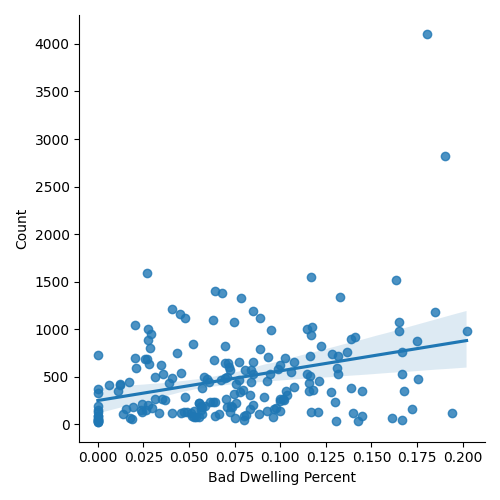

In [25]:
# combined_df.plot(kind="scatter", x="Bad Dwelling Percent", y="Count")
sns.lmplot(x="Bad Dwelling Percent", y="Count", data=combined_df)
plt.show()

In [26]:
combined_df['Private Commuting Percent'] = combined_df['Commuting Method Percent'].str.strip("[]").str.split(', ').str[0].astype(float)
combined_df['Public Commuting Percent'] = combined_df['Commuting Method Percent'].str.strip("[]").str.split(', ').str[1].astype(float)

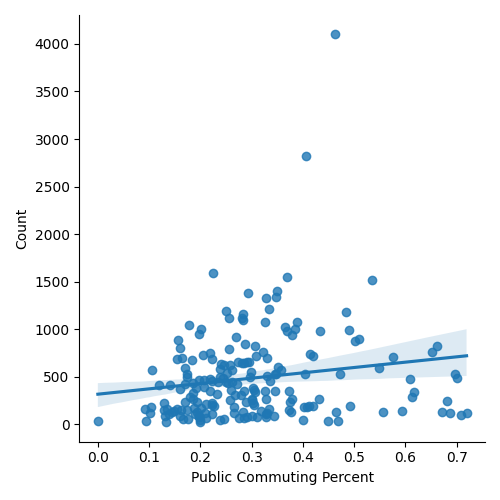

In [27]:
# combined_df.plot(kind="scatter", x="Public Commuting Percent", y="Count")
sns.lmplot(x="Public Commuting Percent", y="Count", data=combined_df)
plt.show()

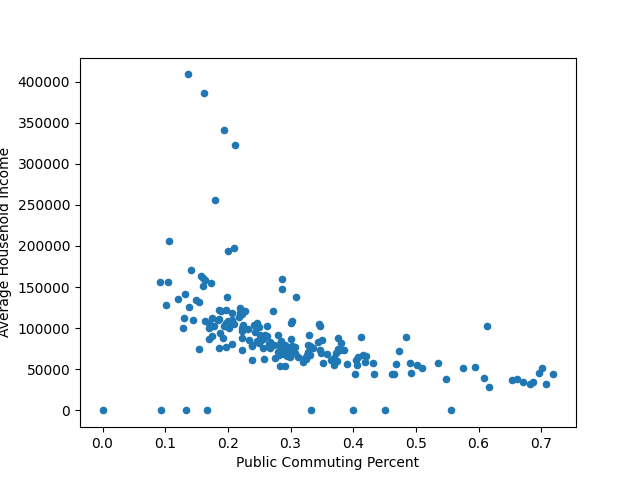

In [28]:
combined_df.plot(kind="scatter", x="Public Commuting Percent", y="Average Household Income")
plt.show()

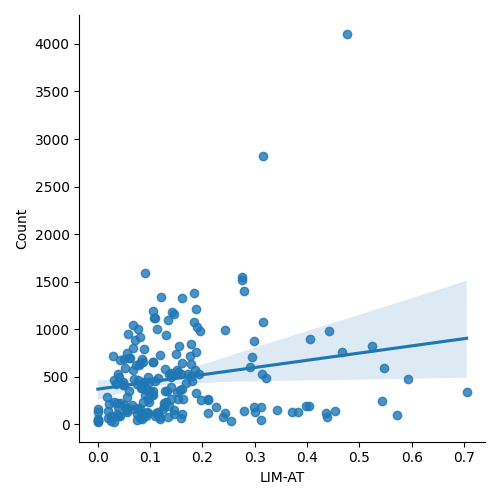

In [29]:
sns.lmplot(x="LIM-AT", y="Count", data=combined_df)
plt.show()

In [30]:
combined_df[combined_df["LIM-AT"] > 0.2][combined_df["Count"] < 500]

/var/folders/p_/999v4cl56z9dl2jlxqtv8c5r0000gn/T/ipykernel_9269/2263910173.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  combined_df[combined_df["LIM-AT"] > 0.2][combined_df["Count"] < 500]


,Count,Boundary Type,Boundary Name,Population 2016,Population Density 2016,Year opened,Aboriginal,Aboriginal Percent,Visible Minorities Names,Visible Minorities Numbers,...,No Education,High School Education,Undergraduate Education,Non Citizenship Percent,House,Apartment,Other,Rent Percent,Private Commuting Percent,Public Commuting Percent
30,34,Neighbourhood,Kensington,270,2563.493947,1971,60,0.222222,"['Filipino', 'South Asian', 'Black']","[50, 30, 10]",...,0.369565,0.304348,0.326087,0.074074,120,0,0,0.434783,0.531250,0.468750
38,46,Neighbourhood,Tuxedo Industrial,545,82.194648,2016,20,0.036697,"['South Asian', 'Arab', 'Filipino']","[40, 35, 30]",...,0.087912,0.285714,0.626374,0.302752,10,260,0,0.769231,0.761905,0.238095
51,79,Neighbourhood,Edgeland,1255,4638.596076,1971,160,0.127490,"['Black', 'West Asian', 'Visible minority not ...","[125, 60, 55]",...,0.224490,0.341837,0.433673,0.099602,195,430,0,0.587302,0.671875,0.328125
52,80,Neighbourhood,Dufresne,370,2334.885717,1971,105,0.283784,"['Black', 'Filipino', 'South Asian']","[10, 0, 0]",...,0.279412,0.294118,0.426471,0.000000,150,45,0,0.333333,0.688889,0.311111
62,94,Neighbourhood,China Town,420,6364.311366,1986,0,0.000000,"['Chinese', 'South Asian', 'Filipino']","[310, 30, 25]",...,0.513889,0.291667,0.194444,0.476190,0,190,0,1.000000,0.291667,0.708333
68,115,Neighbourhood,Vialoux,950,1720.394278,1971,75,0.078947,"['Filipino', 'South Asian', 'Arab']","[15, 15, 15]",...,0.157576,0.303030,0.539394,0.068421,215,280,0,0.535354,0.733333,0.266667
69,119,Neighbourhood,Portage-Ellice,1075,6343.268170,2001,120,0.111628,"['South Asian', 'Chinese', 'Filipino']","[110, 90, 70]",...,0.090909,0.292929,0.616162,0.251163,10,685,0,0.941606,0.280488,0.719512
72,124,Neighbourhood,Polo Park,275,271.703959,1971,25,0.090909,"['South Asian', 'Chinese', 'Filipino']","[65, 20, 15]",...,0.056604,0.433962,0.509434,0.454545,0,180,0,0.944444,0.312500,0.687500
76,127,Neighbourhood,Colony,645,5140.753021,1986,100,0.155039,"['Black', 'Filipino', 'South Asian']","[95, 90, 45]",...,0.090164,0.278689,0.631148,0.286822,0,470,0,1.000000,0.329114,0.670886
78,129,Neighbourhood,Pembina Strip,3175,4444.313798,1971,150,0.047244,"['South Asian', 'Chinese', 'Black']","[635, 390, 230]",...,0.120996,0.291815,0.587189,0.406299,10,1680,0,0.807122,0.535211,0.464789
